# Initialization

In [ ]:
import yaml

import numpy as np
import matplotlib.pyplot as plt
import torch
from initialization_utils import *

In [6]:
experience = "Init2"

In [3]:
with open("configs/" + experience + ".yaml", "r") as ymlfile:
    config = yaml.safe_load(ymlfile)

save_path = config["EXPERIMENT_PARAMS"]["results_path"] + experience + "/"

In [4]:
losses_dict = torch.load(save_path + "losses.pth", weights_only=False)

train_loss_dict = losses_dict["train_loss_dict"]
val_loss_dict = losses_dict["val_loss_dict"]

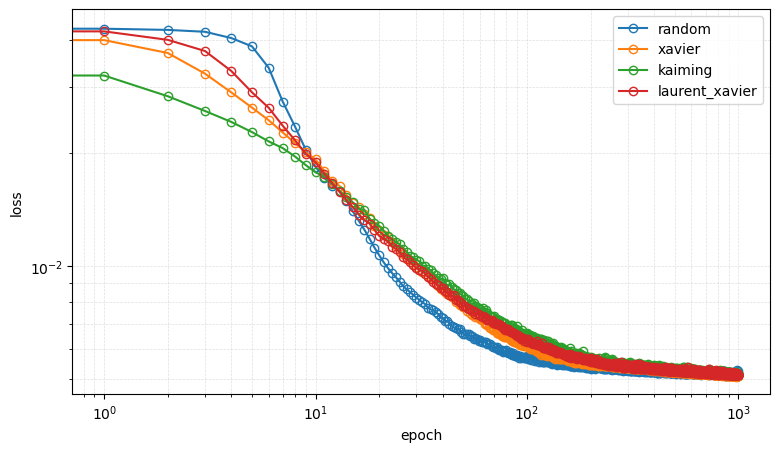

In [5]:
fig =  plt.subplots(figsize=(9, 5))

for (key, training_loss), val_loss in zip(train_loss_dict.items(), val_loss_dict.values()):
    training_loss, val_loss = np.array(training_loss), np.array(val_loss)

    mean_train_losses = np.mean(np.mean(training_loss, axis=2), axis = 0)
    mean_val_losses = np.mean(val_loss, axis = 0)
    
    plt.loglog(mean_val_losses, label=f'{key}', marker = 'o', fillstyle='none')
    
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha = 0.4)
plt.legend() 
plt.show()